In [1]:
using CPTVCA
using ExactDiagonalization
using QuantumLattices
using Distributed
using Plots

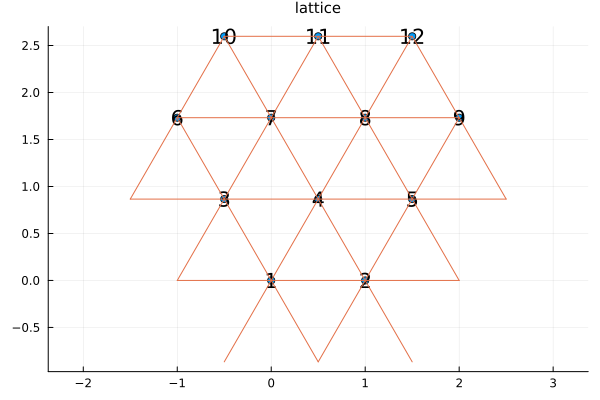

In [21]:
unitcell = Lattice([0, 0]; vectors = [[1, 0], [-1/2, √3/2]])
cluster = Lattice([0.0, 0.0], [1, 0], [-1/2, √3/2], [1/2, √3/2], [3/2, √3/2], 
[-1, √3], [0, √3], [1, √3], [2, √3], [-1/2, 3√3/2], [1/2, 3√3/2], [3/2, 3√3/2]; vectors = [[3, √3], [-3, √3]])

plot(cluster,1;siteon=true)

In [10]:

hilbert = Hilbert(site=>Fock{:f}(1, 2) for site=1:length(cluster))
r = Onsite(:r, Complex(1.0),spinrotation(π/2, 7π/6); amplitude=belongs([1,5,7,12]))
g = Onsite(:g, Complex(1.0),spinrotation(π/2, 11π/6); amplitude=belongs([2,3,8,10]))
b = Onsite(:b, Complex(1.0),spinrotation(π/2, π/2); amplitude=belongs([4,6,9,11]))
referterms = (r, g, b)
neighbors = Neighbors(0=>0.0)

k = EDKind(typeof(referterms))
table = Table(hilbert, Metric(k, hilbert))
origibonds = bonds(cluster, neighbors)
referbonds = filter(bond -> isintracell(bond), origibonds)
refergenerator = OperatorGenerator(referterms, referbonds, hilbert; table = table)
rops = expand(refergenerator)


Operators with 24 Operator
  Operator(-0.86603+0.5im, CompositeIndex(Index(1, FID{:f}(1, 1//2, 2)), [0.0, 0.0], [0.0, 0.0]), CompositeIndex(Index(1, FID{:f}(1, -1//2, 1)), [0.0, 0.0], [0.0, 0.0]))
  Operator(1.0im, CompositeIndex(Index(11, FID{:f}(1, -1//2, 2)), [0.5, 2.598076211353316], [0.0, 0.0]), CompositeIndex(Index(11, FID{:f}(1, 1//2, 1)), [0.5, 2.598076211353316], [0.0, 0.0]))
  Operator(0.86603-0.5im, CompositeIndex(Index(3, FID{:f}(1, -1//2, 2)), [-0.5, 0.8660254037844386], [0.0, 0.0]), CompositeIndex(Index(3, FID{:f}(1, 1//2, 1)), [-0.5, 0.8660254037844386], [0.0, 0.0]))
  Operator(-0.86603-0.5im, CompositeIndex(Index(12, FID{:f}(1, -1//2, 2)), [1.5, 2.598076211353316], [0.0, 0.0]), CompositeIndex(Index(12, FID{:f}(1, 1//2, 1)), [1.5, 2.598076211353316], [0.0, 0.0]))
  Operator(0.86603+0.5im, CompositeIndex(Index(10, FID{:f}(1, 1//2, 2)), [-0.5, 2.598076211353316], [0.0, 0.0]), CompositeIndex(Index(10, FID{:f}(1, -1//2, 1)), [-0.5, 2.598076211353316], [0.0, 0.0]))
  Operator

In [11]:
length(rops)

24

In [16]:
Operators(filter(rop->rop[1].index.site∈(1, 5, 7, 12), rops|>collect)...)

Operators with 8 Operator
  Operator(-0.86603+0.5im, CompositeIndex(Index(1, FID{:f}(1, 1//2, 2)), [0.0, 0.0], [0.0, 0.0]), CompositeIndex(Index(1, FID{:f}(1, -1//2, 1)), [0.0, 0.0], [0.0, 0.0]))
  Operator(-0.86603+0.5im, CompositeIndex(Index(7, FID{:f}(1, 1//2, 2)), [0.0, 1.7320508075688772], [0.0, 0.0]), CompositeIndex(Index(7, FID{:f}(1, -1//2, 1)), [0.0, 1.7320508075688772], [0.0, 0.0]))
  Operator(-0.86603+0.5im, CompositeIndex(Index(12, FID{:f}(1, 1//2, 2)), [1.5, 2.598076211353316], [0.0, 0.0]), CompositeIndex(Index(12, FID{:f}(1, -1//2, 1)), [1.5, 2.598076211353316], [0.0, 0.0]))
  Operator(-0.86603-0.5im, CompositeIndex(Index(7, FID{:f}(1, -1//2, 2)), [0.0, 1.7320508075688772], [0.0, 0.0]), CompositeIndex(Index(7, FID{:f}(1, 1//2, 1)), [0.0, 1.7320508075688772], [0.0, 0.0]))
  Operator(-0.86603+0.5im, CompositeIndex(Index(5, FID{:f}(1, 1//2, 2)), [1.5, 0.8660254037844386], [0.0, 0.0]), CompositeIndex(Index(5, FID{:f}(1, -1//2, 1)), [1.5, 0.8660254037844386], [0.0, 0.0]))
  Op

In [19]:
Operators(filter(rop->rop[1].index.site∈(6, 4, 9, 11), rops|>collect)...)

Operators with 8 Operator
  Operator(-1.0im, CompositeIndex(Index(9, FID{:f}(1, 1//2, 2)), [2.0, 1.7320508075688772], [0.0, 0.0]), CompositeIndex(Index(9, FID{:f}(1, -1//2, 1)), [2.0, 1.7320508075688772], [0.0, 0.0]))
  Operator(1.0im, CompositeIndex(Index(11, FID{:f}(1, -1//2, 2)), [0.5, 2.598076211353316], [0.0, 0.0]), CompositeIndex(Index(11, FID{:f}(1, 1//2, 1)), [0.5, 2.598076211353316], [0.0, 0.0]))
  Operator(-1.0im, CompositeIndex(Index(4, FID{:f}(1, 1//2, 2)), [0.5, 0.8660254037844386], [0.0, 0.0]), CompositeIndex(Index(4, FID{:f}(1, -1//2, 1)), [0.5, 0.8660254037844386], [0.0, 0.0]))
  Operator(1.0im, CompositeIndex(Index(4, FID{:f}(1, -1//2, 2)), [0.5, 0.8660254037844386], [0.0, 0.0]), CompositeIndex(Index(4, FID{:f}(1, 1//2, 1)), [0.5, 0.8660254037844386], [0.0, 0.0]))
  Operator(1.0im, CompositeIndex(Index(9, FID{:f}(1, -1//2, 2)), [2.0, 1.7320508075688772], [0.0, 0.0]), CompositeIndex(Index(9, FID{:f}(1, 1//2, 1)), [2.0, 1.7320508075688772], [0.0, 0.0]))
  Operator(-1.0im

In [20]:
Operators(filter(rop->rop[1].index.site∈(2, 3, 8, 10), rops|>collect)...)

Operators with 8 Operator
  Operator(0.86603-0.5im, CompositeIndex(Index(10, FID{:f}(1, -1//2, 2)), [-0.5, 2.598076211353316], [0.0, 0.0]), CompositeIndex(Index(10, FID{:f}(1, 1//2, 1)), [-0.5, 2.598076211353316], [0.0, 0.0]))
  Operator(0.86603+0.5im, CompositeIndex(Index(8, FID{:f}(1, 1//2, 2)), [1.0, 1.7320508075688772], [0.0, 0.0]), CompositeIndex(Index(8, FID{:f}(1, -1//2, 1)), [1.0, 1.7320508075688772], [0.0, 0.0]))
  Operator(0.86603+0.5im, CompositeIndex(Index(3, FID{:f}(1, 1//2, 2)), [-0.5, 0.8660254037844386], [0.0, 0.0]), CompositeIndex(Index(3, FID{:f}(1, -1//2, 1)), [-0.5, 0.8660254037844386], [0.0, 0.0]))
  Operator(0.86603-0.5im, CompositeIndex(Index(3, FID{:f}(1, -1//2, 2)), [-0.5, 0.8660254037844386], [0.0, 0.0]), CompositeIndex(Index(3, FID{:f}(1, 1//2, 1)), [-0.5, 0.8660254037844386], [0.0, 0.0]))
  Operator(0.86603-0.5im, CompositeIndex(Index(8, FID{:f}(1, -1//2, 2)), [1.0, 1.7320508075688772], [0.0, 0.0]), CompositeIndex(Index(8, FID{:f}(1, 1//2, 1)), [1.0, 1.73205

In [2]:
unitcell = Lattice([0, 0]; vectors=[[1, 0],[-1/2, √3/2]])
cluster = Lattice([0, 0],[1, 0], [1/2, √3/2];vectors=[[3/2,√3/2],[0,√3]])
#cluster = Lattice(unitcell, (2,2), ('p','p'))
hilbert = Hilbert(site=>Fock{:f}(1, 2) for site=1:length(cluster))
cons = Conservation(3,1//2;np=3)
#cons = Conservation(4,1//2;np=4)
t = Hopping(:t, Complex(-1.0), 1)
U = Hubbard(:U, Complex(12.0))
μ = Onsite(:μ, Complex(-6.0))
origiterms = (t, U, μ)

r = Onsite(:r, Complex(0.0),spinrotation(π/2, 7π/6); amplitude=belongs([1]))
g = Onsite(:g, Complex(0.0),spinrotation(π/2, 11π/6); amplitude=belongs([2]))
b = Onsite(:b, Complex(0.0),spinrotation(π/2, π/2); amplitude=belongs([3]))
referterms = (t, U, r, g, b, μ)
#=
up = Onsite(:up, Complex(0.0);amplitude=belongs([1,2]))
ud = Onsite(:ud, Complex(0.0);amplitude=belongs([3,4]))
referterms = (t, U, up, ud)
=#

(Term{:Hopping, :t, ComplexF64, Int64, QuantumLattices.DegreesOfFreedom.TermCoupling{Coupling{Int64, Tuple{Index{Colon, FID{:*, Colon, Colon, Colon}}, Index{Colon, FID{:*, Colon, Colon, Colon}}}, Constraint{(2,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{(:orbital, :spin)}}}}, Coupling{Int64, Tuple{Index{Colon, FID{:*, Colon, Colon, Colon}}, Index{Colon, FID{:*, Colon, Colon, Colon}}}, Constraint{(2,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{(:orbital, :spin)}}}}}, QuantumLattices.DegreesOfFreedom.TermAmplitude{Nothing}, QuantumLattices.DegreesOfFreedom.TermModulate{Val{true}, :t}}(-1.0 + 0.0im, 1, QuantumLattices.DegreesOfFreedom.TermCoupling{Coupling{Int64, Tuple{Index{Colon, FID{:*, Colon, Colon, Colon}}, Index{Colon, FID{:*, Colon, Colon, Colon}}}, Constraint{(2,), 1, Tuple{QuantumLattices.DegreesOfFreedom.Diagonal{(:orbital, :spin)}}}}, Coupling{Int64, Tuple{Index{Colon, FID{:*, Colon, Colon, Colon}}, Index{Colon, FID{:*, Colon, Colon, Colon}}}, Constraint{(2,)

In [3]:
varparams = [(r = a, g = a, b = a) for a in range(0,0.3,50)]
#varparams = [(up = a, ud = -a) for a in range(0,0.3,50)]
rz = ReciprocalZone(reciprocals(cluster.vectors); length=100)
neighbors = Neighbors(0=>0.0, 1=>1.0)

Neighbors{Int64, Float64} with 2 entries:
  0 => 0.0
  1 => 1.0

In [4]:
spawn(11)
@time vcas = pmap(param -> VCA(unitcell, cluster, hilbert, origiterms, referterms, cons, param; neighbors=neighbors, m=200), varparams)
#saveData(vcas, "./temp/squareL4_af.jls")
#vcas = loadData("./temp/squareL4_af.jls")
#@time gps = pmap(vca -> GrandPotential(vca, rz, real(Parameters(vca.refergenerator)[:U]/2)), vcas)
@time gps = pmap(vca -> GrandPotential(vca, rz, 0), vcas)
#saveData(gps, "./temp/squareL4af_gp.jls")
#gps = loadData("./temp/squareL4af_gp.jls")
g1 = [gp[1] for gp in gps]


      From worker 5:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`


      From worker 2:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 3:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 4:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 6:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 7:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 12:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 8:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 10:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`
      From worker 11:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`


      From worker 9:	  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/mygit/CPTVCA`


 35.825319 seconds (9.67 M allocations: 559.013 MiB, 0.43% gc time, 5.33% compilation time: 0% of which was recompilation)


 16.880156 seconds (3.49 M allocations: 188.800 MiB, 0.13% gc time, 3.99% compilation time)


50-element Vector{Float64}:
 -6.328784894087348
 -6.3305895154931635
 -6.332565048397535
 -6.334553638534877
 -6.336559358143389
 -6.3385856694018266
 -6.340635412715737
 -6.342710829882308
 -6.344813609829557
 -6.3469449471022665
  ⋮
 -6.427962842816871
 -6.4307709254624505
 -6.433589748201786
 -6.436418974392724
 -6.439258284054205
 -6.442107372970585
 -6.444965951837147
 -6.447833745447167
 -6.450710491920007

In [20]:
g2 = [gp[2] for gp in gps]

50-element Vector{Float64}:
 -0.5042782672859466
 -0.4897457738951194
 -0.483051212875672
 -0.47601681313980093
 -0.4686839725263297
 -0.4610905768100118
 -0.4532708578747773
 -0.4452554258564265
 -0.4370714216553246
 -0.42874274586882494
  ⋮
 -0.14252934002648102
 -0.13357323870342283
 -0.12462627051208602
 -0.11568854538828892
 -0.1067601520111226
 -0.09784116054909997
 -0.08893162505484944
 -0.08003158555510537
 -0.07114106987602258

In [21]:
g3 = [gp[3] for gp in gps]

50-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [8]:
gses = [vca.solver.sysvals.gsenergy for vca in vcas]

50-element Vector{Float64}:
 -18.48981129207242
 -18.502022772584375
 -18.514643932316933
 -18.527644102464823
 -18.540994101903838
 -18.554666431395482
 -18.56863538027244
 -18.582877063790495
 -18.597369407833344
 -18.612092095437976
   ⋮
 -19.14135918842414
 -19.15873953768393
 -19.176142974093278
 -19.19356837778985
 -19.21101470015151
 -19.228480958362667
 -19.245966230456624
 -19.263469650786398
 -19.280990405883983

In [9]:
neighbors0 = Neighbors(0=>0.0)
@time vcas0 = pmap(param -> VCA(unitcell, cluster, hilbert, origiterms, referterms, cons, param; neighbors=neighbors0, m=200), varparams)
@time gps0 = pmap(vca -> GrandPotential(vca, rz, 0), vcas0)
g1 = [gp0[1] for gp0 in gps0]

  0.667903 seconds (963.61 k allocations: 96.937 MiB, 12.33% gc time, 6.51% compilation time)


 10.727967 seconds (323.73 k allocations: 27.874 MiB, 0.42% compilation time)


50-element Vector{Float64}:
 -6.0
 -6.0030627851446345
 -6.006128686827033
 -6.009197697905262
 -6.012269811256089
 -6.01534501977535
 -6.018423316379539
 -6.02150469400345
 -6.02458914560123
 -6.027676664146601
  ⋮
 -6.128055557663219
 -6.1312404679317885
 -6.134428217479614
 -6.137618799933274
 -6.1408122089363895
 -6.144008438150974
 -6.147207481257495
 -6.150409331953134
 -6.153613983953881

In [10]:
g2 = [gp0[2] for gp0 in gps0]

50-element Vector{Float64}:
 -0.0
  0.009178991504882819
  0.0183486333964597
  0.027508947100552513
  0.03665995398684799
  0.0458016753678322
  0.054934132494046634
  0.06405734656110129
  0.07317133870651957
  0.08227613000918507
  ⋮
  0.3688945515001423
  0.37770716763320555
  0.38651126592850454
  0.3953068655063013
  0.40409398543572833
  0.41287264473075547
  0.4216428623499662
  0.4304046572018219
  0.43915804813835585

In [11]:
g3 = [gp0[3] for gp0 in gps0]

50-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [12]:
gses0 = [vca.solver.sysvals.gsenergy for vca in vcas0]

50-element Vector{Float64}:
 -18.0
 -18.018367346938785
 -18.03673469387756
 -18.05510204081634
 -18.073469387755114
 -18.091836734693885
 -18.110204081632663
 -18.128571428571448
 -18.14693877551021
 -18.16530612244899
   ⋮
 -18.753061224489798
 -18.77142857142857
 -18.789795918367346
 -18.808163265306124
 -18.8265306122449
 -18.844897959183676
 -18.86326530612245
 -18.881632653061224
 -18.9

In [13]:
neighbors1 = Neighbors(1=>1.0)
@time vcas1 = pmap(param -> VCA(unitcell, cluster, hilbert, origiterms, referterms, cons, param; neighbors=neighbors1, m=200), varparams)
@time gps1 = pmap(vca -> GrandPotential(vca, rz, 0), vcas1)
g1 = [gp1[1] for gp1 in gps1]

  0.595090 seconds (1.09 M allocations: 105.377 MiB, 16.91% gc time, 8.45% compilation time)


 20.307102 seconds (402.33 k allocations: 30.388 MiB, 0.77% gc time, 0.21% compilation time)


50-element Vector{Float64}:
 -1.7316973446457624
 -1.7316973446457624
 -1.731697344645762
 -1.731697344645762
 -1.731697344645762
 -1.7316973446457622
 -1.731697344645762
 -1.7316973446457624
 -1.7316973446457624
 -1.7316973446457624
  ⋮
 -1.731697344645762
 -1.7316973446457624
 -1.7316973446457624
 -1.7316973446457629
 -1.731697344645762
 -1.7316973446457624
 -1.7316973446457624
 -1.7316973446457624
 -1.731697344645762

In [14]:
g2 = [gp1[2] for gp1 in gps1]

50-element Vector{Float64}:
 -2.195092033937288
 -2.1950920339372892
 -2.195092033937287
 -2.195092033937289
 -2.195092033937289
 -2.1950920339372884
 -2.1950920339372897
 -2.195092033937289
 -2.1950920339372915
 -2.1950920339372884
  ⋮
 -2.195092033937287
 -2.1950920339372897
 -2.1950920339372875
 -2.195092033937292
 -2.195092033937287
 -2.195092033937289
 -2.1950920339372906
 -2.195092033937288
 -2.1950920339372897

In [15]:
g3 =[gp1[3] for gp1 in gps1]

50-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [11]:
gses1 = [vca.solver.sysvals.gsenergy for vca in vcas1]

50-element Vector{Float64}:
 -2.999999999999999
 -2.999999999999999
 -2.9999999999999982
 -2.9999999999999982
 -2.9999999999999982
 -2.9999999999999973
 -2.9999999999999982
 -2.9999999999999973
 -2.9999999999999982
 -2.9999999999999982
  ⋮
 -2.9999999999999964
 -2.9999999999999973
 -2.9999999999999982
 -2.9999999999999982
 -2.999999999999999
 -2.9999999999999973
 -2.999999999999999
 -2.9999999999999973
 -2.999999999999999

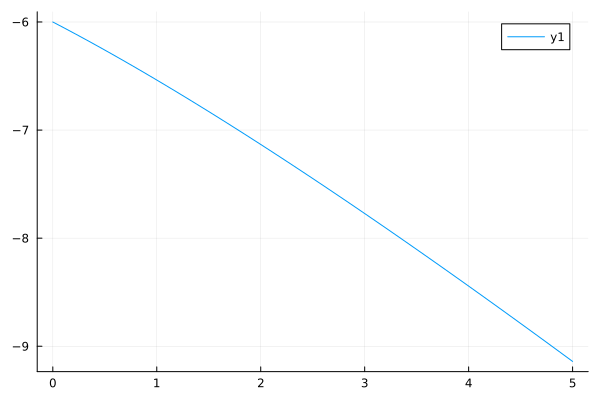

In [21]:
plot(range(0, 10, 50), gps)

In [21]:
using LinearAlgebra
function ek(nv::AbstractVector, t::Real, k::AbstractVector)
    ek = 0.0
    for i in eachindex(nv)
        ek += exp(im*dot(k, nv[i])) + exp(-im*dot(k, nv[i]))
    end
    return t*ek.re
end

function tbae(nv::AbstractVector, t::Real, rz::AbstractVector, ff::Real)
    e = Vector{Float64}(undef, length(rz))
    for i in eachindex(rz)
        e[i] = ek(nv, t, rz[i])
    end
    ne = sort(e)
    return ne[Int(length(rz)*ff)]
end

tbae([[1,0],[1/2,√3/2],[-1/2,√3/2]], -1, rz, 1//2)
#tbae([[1,0],[1/2,√3/2],[-1/2,√3/2],[-1,0],[-1/2,-√3/2],[1/2,-√3/2]], -1, rz, 1//2)

-2.8772402363717275